In [708]:
#Importing data from Excel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel (r'Documents\Album_Ratings.xlsx')
print (df)


      Unnamed: 0  position                       release_name  \
0              1         1                        OK Computer   
1              2         2                              Kid A   
2              3         3          The Dark Side of the Moon   
3              4         4                           Loveless   
4              5         5  My Beautiful Dark Twisted Fantasy   
...          ...       ...                                ...   
4995        4996      4996                              Copia   
4996        4997      4997   Let Mortal Heroes Sing Your Fame   
4997        4998      4998                     Dangerous Days   
4998        4999      4999                     Third Ear Band   
4999        5000      5000                          The Album   

              artist_name release_date release_type main_genre  \
0               Radiohead   1997-06-16        album       Rock   
1               Radiohead   2000-10-03        album       Rock   
2              Pink F

In [709]:
# Return the columns names
# Unnamed: 0: Count of the columns. Not much use as is a direct duplicate of the second column
# position: The rank of the album based on rating_count
# release_name: Name of the album
# artist_name: Name of the artist who released the album
# release_date: Date the album was released
# release_type: The media type. This is always "album"
# main_genre: The main music genre the album relates to
# primary_genres: The genres of music the album consists of
# secondary_genres: Any subgenres of music the album consists of
# descriptors: Themes & concepts that the album is based on
# avg_rating: The average rating that the album was given across all ratings
# rating_count: Total times the album has been rated
# review_count: Total times the album has been reviewed
df.columns

Index(['Unnamed: 0', 'position', 'release_name', 'artist_name', 'release_date',
       'release_type', 'main_genre', 'primary_genres', 'secondary_genres',
       'descriptors', 'avg_rating', 'rating_count', 'review_count'],
      dtype='object')

In [710]:
# 5000 total rows, 12 columns
# Rows 1 & 2 appear to be duplicates relating to the rank of the albums and are objects
# Not much missing data. primary_genres is missing one record while secondary_genres is missing 495 records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        5000 non-null   int64         
 1   position          5000 non-null   int64         
 2   release_name      5000 non-null   object        
 3   artist_name       5000 non-null   object        
 4   release_date      5000 non-null   datetime64[ns]
 5   release_type      5000 non-null   object        
 6   main_genre        5000 non-null   object        
 7   primary_genres    4999 non-null   object        
 8   secondary_genres  4505 non-null   object        
 9   descriptors       5000 non-null   object        
 10  avg_rating        5000 non-null   float64       
 11  rating_count      5000 non-null   int64         
 12  review_count      5000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 507.9+ KB


In [711]:
# First 5 rows returned
df.head()

,Unnamed: 0,position,release_name,artist_name,release_date,release_type,main_genre,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count
0,1,1,OK Computer,Radiohead,1997-06-16,album,Rock,"Alternative Rock, Art Rock",NaN,"melancholic, anxious, futuristic, malevocals, ...",4.24,74027,1541
1,2,2,Kid A,Radiohead,2000-10-03,album,Rock,"Art Rock, Experimental Rock, Electronic","Ambient, Electronic, IDM","cold, melancholic, futuristic, anxious, atmosp...",4.23,61658,751
2,3,3,The Dark Side of the Moon,Pink Floyd,1973-03-23,album,Rock,"Art Rock, Progressive Rock","Psychedelic Rock, Space Rock","philosophical, atmospheric, introspective, exi...",4.21,60192,1557
3,4,4,Loveless,My Bloody Valentine,1991-11-11,album,Pop,"Shoegaze, Noise Pop","Dream Pop, Neo-Psychedelia","noisy, ethereal, atmospheric, romantic, love, ...",4.24,53174,1264
4,5,5,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,album,Rap,"Pop Rap, Hip Hop",Art Pop,"epic, boastful, passionate, sampling, hedonist...",4.09,52149,638


In [712]:
# Returns the number of unique records in each column
# There are 2090 different artists who make up the 5000 records
# There are 4938 unique realease_name which suggests that some albums in the list have the same name
df.nunique()

Unnamed: 0          5000
position            5000
release_name        4938
artist_name         2090
release_date        3271
release_type           1
main_genre            10
primary_genres      2245
secondary_genres    3371
descriptors         4997
avg_rating           244
rating_count        3552
review_count         443
dtype: int64

In [713]:
# make a copy of the dataset
albums_df = df.copy()

In [714]:
# Adding a name, "rank" to the first column that was previously unnamed
albums_df_allnamed = albums_df.rename(columns={'Unnamed: 0': 'rank'})

In [715]:
# The first column is now renamed as rank
albums_df_allnamed.columns

Index(['rank', 'position', 'release_name', 'artist_name', 'release_date',
       'release_type', 'main_genre', 'primary_genres', 'secondary_genres',
       'descriptors', 'avg_rating', 'rating_count', 'review_count'],
      dtype='object')

In [716]:
# Make a copy of the dataset
albums_df_removecol = albums_df_allnamed


In [717]:
# As the columns rank & position are essentially the same, we are going to remove the position column
del albums_df_removecol["position"]

In [718]:
# position column now removed
albums_df_removecol.columns

Index(['rank', 'release_name', 'artist_name', 'release_date', 'release_type',
       'main_genre', 'primary_genres', 'secondary_genres', 'descriptors',
       'avg_rating', 'rating_count', 'review_count'],
      dtype='object')

In [719]:
# Locating row with null entry for primary_genres
albums_df_removecol[albums_df_removecol['primary_genres'].isnull()]

,rank,release_name,artist_name,release_date,release_type,main_genre,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count
632,633,Lust for Life,Iggy Pop,1977-09-09,album,Other,NaN,"Post-Punk, Garage Rock, Punk Rock","energetic, sexual, playful, malevocals, passio...",3.82,10478,151


In [720]:
# Replace null value with "Unknown"
albums_df_removecol['primary_genres'] = albums_df_removecol['primary_genres'].fillna("Unknown")

In [721]:
# As we can see, the primary_genres column now displays "Unknown" for this row
display(albums_df_removecol.iloc[632])

rank                                                              633
release_name                                            Lust for Life
artist_name                                                  Iggy Pop
release_date                                      1977-09-09 00:00:00
release_type                                                    album
main_genre                                                      Other
primary_genres                                                Unknown
secondary_genres                    Post-Punk, Garage Rock, Punk Rock
descriptors         energetic, sexual, playful, malevocals, passio...
avg_rating                                                       3.82
rating_count                                                    10478
review_count                                                      151
Name: 632, dtype: object

In [722]:
# Locating row with null entry for secondary_genres
albums_df_removecol[albums_df_removecol['secondary_genres'].isnull()]

,rank,release_name,artist_name,release_date,release_type,main_genre,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count
0,1,OK Computer,Radiohead,1997-06-16,album,Rock,"Alternative Rock, Art Rock",NaN,"melancholic, anxious, futuristic, malevocals, ...",4.24,74027,1541
49,50,Master of Puppets,Metallica,1986-03-03,album,Metal,Thrash Metal,NaN,"aggressive, heavy, angry, energetic, malevocal...",4.01,32027,735
52,53,Kind of Blue,Miles Davis,1959-08-17,album,Jazz,"Modal Jazz, Cool Jazz",NaN,"instrumental, mellow, improvisation, nocturnal...",4.23,31262,556
66,67,Led Zeppelin,Led Zeppelin,1969-01-12,album,Rock,"Hard Rock, Blues Rock",NaN,"energetic, heavy, malevocals, raw, sexual, pas...",3.95,29279,586
68,69,Enter the Wu-Tang (36 Chambers),Wu-Tang Clan,1993-11-09,album,Hip Hop,"East Coast Hip Hop, Boom Bap, Hardcore Hip Hop",NaN,"urban, aggressive, raw, crime, boastful, rhyth...",4.20,29050,421
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,4947,Death to False Metal,Weezer,2010-11-02,album,Pop,"Power Pop, Alternative Rock",NaN,"malevocals, melodic, introspective, anthemic",1.76,2192,38
4962,4963,inâ€¢ter aâ€¢liâ€¢a,At the Drive-In,2017-05-05,album,Other,Post-Hardcore,NaN,"energetic, malevocals, anxious, aggressive, cr...",3.01,2185,29
4968,4969,Couldn't Stand the Weather,Stevie Ray Vaughan and Double Trouble,1984-05-15,album,Rock,"Blues Rock, Electric Texas Blues",NaN,"malevocals, energetic, rhythmic, melodic, summ...",3.81,2180,46
4989,4990,Tempo of the Damned,Exodus,2004-02-02,album,Metal,Thrash Metal,NaN,"aggressive, rhythmic, malevocals, hateful, vul...",3.75,2174,65


In [723]:
# Replace null value with "Unknown"
albums_df_removecol['secondary_genres'] = albums_df_removecol['secondary_genres'].fillna("Unknown")

In [724]:
# We can see that there are now no null values in the dataset
albums_df_removecol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rank              5000 non-null   int64         
 1   release_name      5000 non-null   object        
 2   artist_name       5000 non-null   object        
 3   release_date      5000 non-null   datetime64[ns]
 4   release_type      5000 non-null   object        
 5   main_genre        5000 non-null   object        
 6   primary_genres    5000 non-null   object        
 7   secondary_genres  5000 non-null   object        
 8   descriptors       5000 non-null   object        
 9   avg_rating        5000 non-null   float64       
 10  rating_count      5000 non-null   int64         
 11  review_count      5000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 468.9+ KB


In [725]:
# Extracting Year from release_date for purpose of future analysis and saving as new column, "year"
albums_df_removecol['year'] = pd.DatetimeIndex(albums_df_removecol['release_date']).year
albums_df_removecol.head()

,rank,release_name,artist_name,release_date,release_type,main_genre,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count,year
0,1,OK Computer,Radiohead,1997-06-16,album,Rock,"Alternative Rock, Art Rock",Unknown,"melancholic, anxious, futuristic, malevocals, ...",4.24,74027,1541,1997
1,2,Kid A,Radiohead,2000-10-03,album,Rock,"Art Rock, Experimental Rock, Electronic","Ambient, Electronic, IDM","cold, melancholic, futuristic, anxious, atmosp...",4.23,61658,751,2000
2,3,The Dark Side of the Moon,Pink Floyd,1973-03-23,album,Rock,"Art Rock, Progressive Rock","Psychedelic Rock, Space Rock","philosophical, atmospheric, introspective, exi...",4.21,60192,1557,1973
3,4,Loveless,My Bloody Valentine,1991-11-11,album,Pop,"Shoegaze, Noise Pop","Dream Pop, Neo-Psychedelia","noisy, ethereal, atmospheric, romantic, love, ...",4.24,53174,1264,1991
4,5,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,album,Rap,"Pop Rap, Hip Hop",Art Pop,"epic, boastful, passionate, sampling, hedonist...",4.09,52149,638,2010


In [726]:
# The dataset is ranked by the rating_count; i.e. the number of times the album has been rated
# Re-ordering the dataset so that it is ordered by the avg rating and then the rating_count
albums_df_resorted = albums_df_removecol.sort_values(by=["avg_rating", "rating_count"] , ascending=False)
albums_df_resorted.head()

,rank,release_name,artist_name,release_date,release_type,main_genre,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count,year
142,143,The Black Saint and the Sinner Lady,Mingus,1963-07-01,album,Jazz,"Avant-Garde Jazz, Third Stream","Experimental Big Band, Flamenco Jazz","instrumental, complex, passionate, suite, dens...",4.34,21489,369,1963
6,7,Wish You Were Here,Pink Floyd,1975-09-12,album,Rock,"Progressive Rock, Art Rock","Space Rock, Psychedelic Rock","melancholic, atmospheric, progressive, malevoc...",4.30,51246,1006,1975
9,10,To Pimp a Butterfly,Kendrick Lamar,2015-03-15,album,Rap,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","Political Hip Hop, Neo-Soul, Funk, Poetry, Exp...","political, conscious, poetic, conceptalbum, pr...",4.30,47821,415,2015
11,12,In the Court of the Crimson King,King Crimson,1969-10-10,album,Rock,"Progressive Rock, Art Rock","Symphonic Prog, Jazz-Rock, Free Improvisation,...","fantasy, epic, progressive, complex, philosoph...",4.30,47415,833,1969
87,88,A Love Supreme,John Coltrane,1965-02-01,album,Jazz,Spiritual Jazz,"Modal Jazz, Post-Bop","improvisation, passionate, spiritual, instrume...",4.30,26404,441,1965


In [727]:
# Add in a new column "avg_rating_rank" which adds a rank based on the avg_rating and rating_count
# Where if an album has the same avg_rating it is ranked higher based on its' rating_count
albums_df_resorted['avg_rating_rank'] = albums_df_resorted['avg_rating'].rank(method='first', ascending=False)
albums_df_resorted.head()

,rank,release_name,artist_name,release_date,release_type,main_genre,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count,year,avg_rating_rank
142,143,The Black Saint and the Sinner Lady,Mingus,1963-07-01,album,Jazz,"Avant-Garde Jazz, Third Stream","Experimental Big Band, Flamenco Jazz","instrumental, complex, passionate, suite, dens...",4.34,21489,369,1963,1.0
6,7,Wish You Were Here,Pink Floyd,1975-09-12,album,Rock,"Progressive Rock, Art Rock","Space Rock, Psychedelic Rock","melancholic, atmospheric, progressive, malevoc...",4.30,51246,1006,1975,2.0
9,10,To Pimp a Butterfly,Kendrick Lamar,2015-03-15,album,Rap,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","Political Hip Hop, Neo-Soul, Funk, Poetry, Exp...","political, conscious, poetic, conceptalbum, pr...",4.30,47821,415,2015,3.0
11,12,In the Court of the Crimson King,King Crimson,1969-10-10,album,Rock,"Progressive Rock, Art Rock","Symphonic Prog, Jazz-Rock, Free Improvisation,...","fantasy, epic, progressive, complex, philosoph...",4.30,47415,833,1969,4.0
87,88,A Love Supreme,John Coltrane,1965-02-01,album,Jazz,Spiritual Jazz,"Modal Jazz, Post-Bop","improvisation, passionate, spiritual, instrume...",4.30,26404,441,1965,5.0


In [728]:
# Adding in a new column to signify the total cumulative rating given to each album
albums_df_resorted['total_rating'] = albums_df_resorted['avg_rating']*albums_df_resorted['rating_count']

albums_df_resorted.head()

,rank,release_name,artist_name,release_date,release_type,main_genre,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count,year,avg_rating_rank,total_rating
142,143,The Black Saint and the Sinner Lady,Mingus,1963-07-01,album,Jazz,"Avant-Garde Jazz, Third Stream","Experimental Big Band, Flamenco Jazz","instrumental, complex, passionate, suite, dens...",4.34,21489,369,1963,1.0,93262.26
6,7,Wish You Were Here,Pink Floyd,1975-09-12,album,Rock,"Progressive Rock, Art Rock","Space Rock, Psychedelic Rock","melancholic, atmospheric, progressive, malevoc...",4.30,51246,1006,1975,2.0,220357.80
9,10,To Pimp a Butterfly,Kendrick Lamar,2015-03-15,album,Rap,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","Political Hip Hop, Neo-Soul, Funk, Poetry, Exp...","political, conscious, poetic, conceptalbum, pr...",4.30,47821,415,2015,3.0,205630.30
11,12,In the Court of the Crimson King,King Crimson,1969-10-10,album,Rock,"Progressive Rock, Art Rock","Symphonic Prog, Jazz-Rock, Free Improvisation,...","fantasy, epic, progressive, complex, philosoph...",4.30,47415,833,1969,4.0,203884.50
87,88,A Love Supreme,John Coltrane,1965-02-01,album,Jazz,Spiritual Jazz,"Modal Jazz, Post-Bop","improvisation, passionate, spiritual, instrume...",4.30,26404,441,1965,5.0,113537.20


Text(0.5, 1.0, 'Distribution of Albums by Genre')

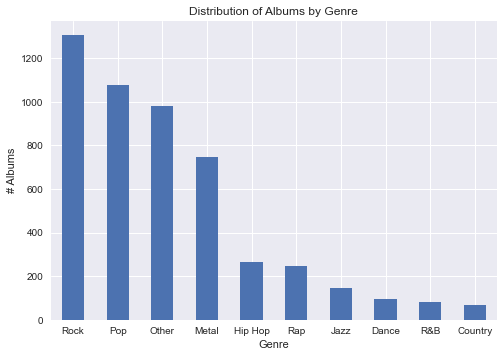

In [729]:
# Here we will look at the distribution of the 5000 albums by genre
# Rock, followed by Pop albums are those with the most entries as we can see
genre_count = albums_df_resorted.main_genre.value_counts()
# create the bar plot
ax = genre_count.plot(kind='bar')
# rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# set the y-axis label
ax.set_ylabel("# Albums")
# set the x-axis label
ax.set_xlabel("Genre")
# set the title
ax.set_title("Distribution of Albums by Genre")




Text(0.5, 1.0, 'Artists with the most albums in the list')

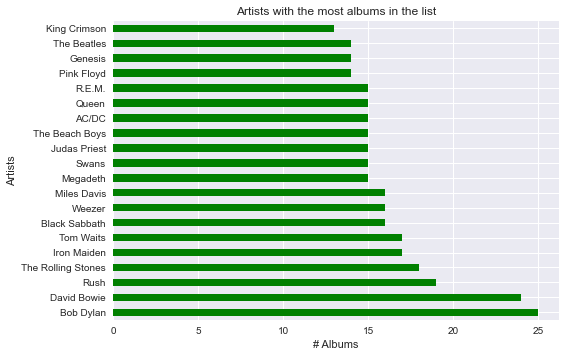

In [730]:
# Here we will look at the artists with the most albums in the dataset
# Due to the large number of artists in the dataset we will only return at the top 20 artists
# As we can see Bob Dylan and David Bowie are the the artists with the most albums in the dataset and the only two who have over 20 albums
# Using a horizontal bar chart as the best way to display this data due to the length of the artist names
artist_count = albums_df_resorted.artist_name.value_counts()[:20]
# create the bar plot
ax1 = artist_count.plot(kind='barh', color = "green")
# set the y-axis label
ax1.set_ylabel("Artists")
# set the x-axis label
ax1.set_xlabel("# Albums")
# set the title
ax1.set_title("Artists with the most albums in the list")


Text(0, 0.5, '# Albums')

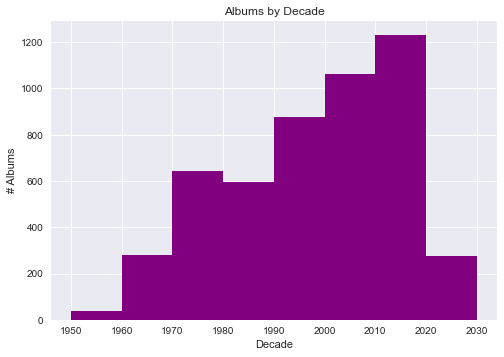

In [731]:
# Here we break the albums in the list out by decade
# Apart from the 1970s there is an increase in albums in the list each decade up to the 2010s
# Using a histogram as the best graph to visualise this particular view
albums_df_resorted.hist(column='year', bins=[1950,1960,1970,1980,1990,2000,2010,2020,2030], color = "purple")
# set the title
plt.title('Albums by Decade')
# set the x-axis label
plt.xlabel('Decade')
# set the y-axis label
plt.ylabel('# Albums')


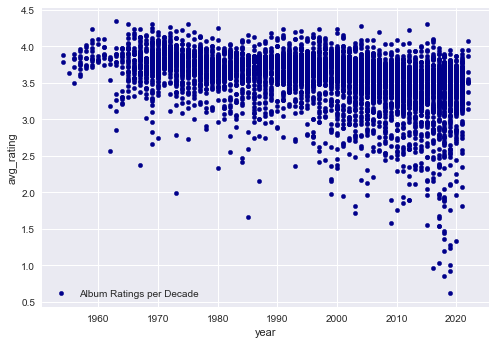

In [732]:
# Here we look at the average_rating of each album per decade
# We can see that as the years pass the number of top rated albums remains fairly settled
# However as the years pass more and more albums have a lower rating
ax2 = albums_df_resorted.plot.scatter(x="year", y="avg_rating", color="DarkBlue", label="Album Ratings per Decade")




C:\Users\cathaloshea\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


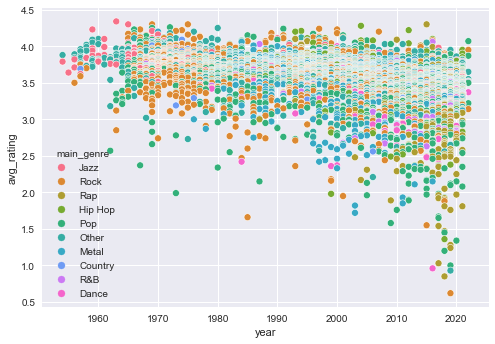

In [733]:
# Here we create a similar chart to before but colour code the data points by the main_genre
sns.scatterplot('year', 'avg_rating', data=albums_df_resorted, hue='main_genre')

plt.show()

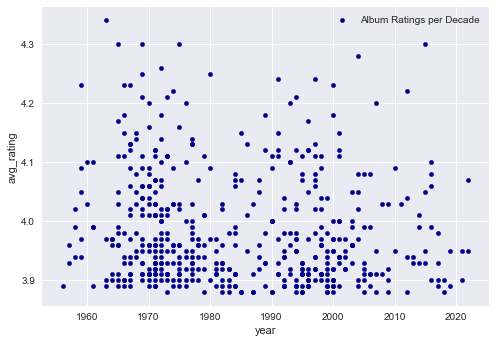

In [734]:
# While the data presented in the previous two graph is interesting, there are alot of data points.
# Create new dataframe limiting results to top 500 rows
albums_df_limit = albums_df_resorted.head(500)
# Each data point can now be seen clearly. 
# Data shows up that the number of top 500 albums decrease as the years pass.
ax3 = albums_df_limit.plot.scatter(x="year", y="avg_rating", color="DarkBlue", label="Album Ratings per Decade")




C:\Users\cathaloshea\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


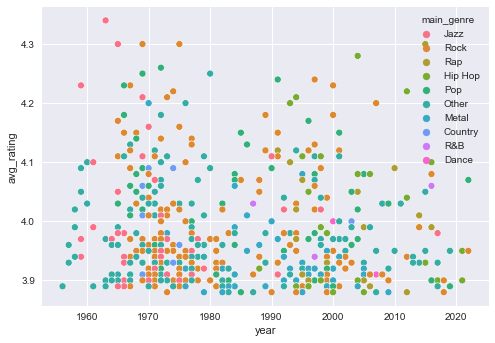

In [735]:
# Using the same dataset we can now clearly see the distribution of the top 500 albums by main_genre
sns.scatterplot('year', 'avg_rating', data=albums_df_limit, hue='main_genre')

plt.show()

C:\Users\cathaloshea\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


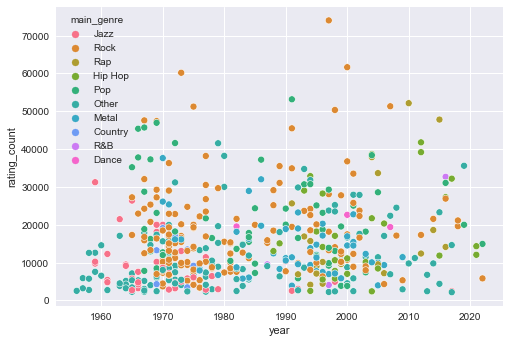

In [736]:
# Here we look at the distribution of the top 500 albums by decade and rating_count broken out by main_genre
# We can see that Rock albums make up a large part of this data set
sns.scatterplot('year', 'rating_count', data=albums_df_limit, hue='main_genre')

plt.show()

<AxesSubplot:xlabel='year', ylabel='rating_count'>

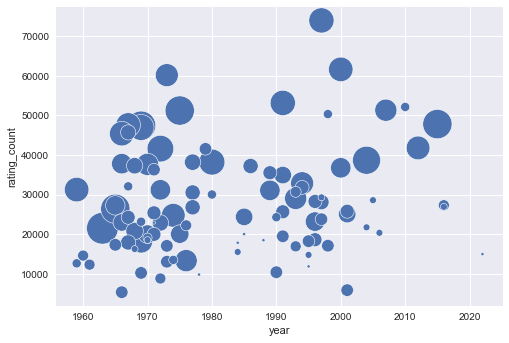

In [737]:
# Creating another dataset with the top 100 albums
albums_df_limit100 = albums_df_resorted.head(100)
# Hwere we can see these albums distribution across each decade and ranked based on the rating_count
# The bubble size is controlled the the avg_rating
# We can see that in general the albums that have the most ratings often have a high avg_rating
sns.scatterplot(data=albums_df_limit100, x="year", y="rating_count", size="avg_rating", legend=False, sizes=(10, 1000))

<AxesSubplot:xlabel='review_count', ylabel='rating_count'>

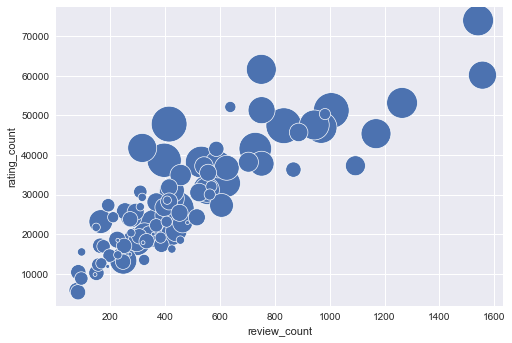

In [738]:
# Here we look at the top 100 albums by rating_count and review_count
# The bubble size is controlled the the avg_rating
# We can see that in general the higher the rating count and the review_count, the higher the avg_rating
sns.scatterplot(data=albums_df_limit100, x="review_count", y="rating_count", size="avg_rating", legend=False, sizes=(15, 1500))

In [739]:
# Introducing a new dataset
# Dataset contains the albums with the most ever sales worldwide
df2 = pd.read_excel (r'Documents\Top_Album_Sales.xlsx')
df2.head()

,Artist,Album,Released,Genre,Certified Copies,Claimed Sales
0,Michael Jackson,Thriller,1982,"Pop, post-disco, funk, rock",49.2,70
1,AC/DC,Back in Black,1980,Hard rock,29.5,50
2,Whitney Houston / various artists,The Bodyguard,1992,"R&B, soul, pop, soundtrack",32.4,45
3,Eagles,Their Greatest Hits (1971–1975),1976,"Country rock, soft rock, folk rock",41.2,44
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, glam rock, progressive rock",21.7,44


In [778]:
# Amending the name of column "Album" to "release_name" in order to join to previous dataset
df2_col = df2.rename(columns={'Album': 'release_name'}, index={'ONE': 'Row_1'})
df2_col.head()

,Artist,release_name,Released,Genre,Certified Copies,Claimed Sales
0,Michael Jackson,Thriller,1982,"Pop, post-disco, funk, rock",49.2,70
1,AC/DC,Back in Black,1980,Hard rock,29.5,50
2,Whitney Houston / various artists,The Bodyguard,1992,"R&B, soul, pop, soundtrack",32.4,45
3,Eagles,Their Greatest Hits (1971–1975),1976,"Country rock, soft rock, folk rock",41.2,44
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, glam rock, progressive rock",21.7,44


In [780]:
# Merging datasets on the artist_name
df_merge= pd.merge(albums_df_resorted,df2_col,on='release_name')
df_merge.head(50)

,rank,release_name,artist_name,release_date,release_type,main_genre,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count,year,avg_rating_rank,total_rating,Artist,Released,Genre,Certified Copies,Claimed Sales
0,7,Wish You Were Here,Pink Floyd,1975-09-12,album,Rock,"Progressive Rock, Art Rock","Space Rock, Psychedelic Rock","melancholic, atmospheric, progressive, malevoc...",4.30,51246,1006,1975,2.0,220357.80,Pink Floyd,1975,"Progressive rock, art rock, experimental rock",NaN,20
1,13,Abbey Road,The Beatles,1969-09-26,album,Pop,Pop Rock,"Psychedelic Pop, Progressive Pop","melodic, warm, malevocals, summer, bittersweet...",4.25,46968,969,1969,8.0,199614.00,The Beatles,1969,Rock,14.4,31
2,3,The Dark Side of the Moon,Pink Floyd,1973-03-23,album,Rock,"Art Rock, Progressive Rock","Psychedelic Rock, Space Rock","philosophical, atmospheric, introspective, exi...",4.21,60192,1557,1973,18.0,253408.32,Pink Floyd,1973,Progressive rock,24.4,44
3,14,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,1967-06-01,album,Pop,"Psychedelic Pop, Pop Rock","Art Rock, Psychedelic Rock, Baroque Pop, Sunsh...","psychedelic, playful, melodic, malevocals, opt...",4.13,45720,887,1967,41.0,188823.60,The Beatles,1967,Rock,18.2,32
4,232,Purple Rain,Prince and The Revolution,1984-06-25,album,Pop,"Pop Rock, Film Soundtrack, Synth Funk","Dance-Pop, Funk Rock","playful, sexual, energetic, sensual, romantic,...",4.07,17842,320,1984,97.0,72616.94,Prince and The Revolution,1984,"Pop rock, new wave, R&B",NaN,25
5,137,Rumours,Fleetwood Mac,1977-02-04,album,Pop,"Pop Rock, Soft Rock","Folk Pop, Country Pop","breakup, bittersweet, melodic, femalevocals, m...",4.00,21715,396,1977,172.0,86860.00,Fleetwood Mac,1977,Soft rock,27.9,40
6,15,Nevermind,Nirvana,1991-09-24,album,Rock,"Grunge, Alternative Rock",Punk Rock,"energetic, rebellious, angry, malevocals, apat...",3.93,45503,947,1991,308.0,178826.79,Nirvana,1991,"Grunge, alternative rock",16.7,30
7,181,Thriller,Michael Jackson,1982-11-30,album,Dance,"Contemporary R&B, Pop, Dance-Pop","Disco, Funk, Pop Soul, Dance-Pop, Synth Funk","energetic, romantic, melodic, party, malevocal...",3.93,19564,319,1982,311.0,76886.52,Michael Jackson,1982,"Pop, post-disco, funk, rock",49.2,70
8,610,The Miseducation of Lauryn Hill,Lauryn Hill,1998-08-25,album,Hip Hop,"Neo-Soul, Contemporary R&B, East Coast Hip Hop","Conscious Hip Hop, Boom Bap","femalevocals, breakup, romantic, warm, love, p...",3.90,10643,138,1998,418.0,41507.70,Lauryn Hill,1998,"Neo Soul, R&B and Hip Hop",NaN,20
9,583,Off the Wall,Michael Jackson,1979-08-10,album,Pop,"Disco, Pop","Funk, Pop Soul, Contemporary R&B, Dance-Pop, B...","party, happy, malevocals, warm, love, rhythmic...",3.84,11091,188,1979,682.0,42589.44,Michael Jackson,1979,"Disco, pop, funk and R&B",NaN,20
